In [2]:
import backtester272 as bt
import pandas as pd
import numpy as np

# Load Datas

In [3]:
# Load data

weights = pd.read_excel('data/Master 272 - AM - Projet indices.xlsx', sheet_name='Composition MSCI World', skiprows=0, index_col=0, engine='openpyxl')
weights.fillna(0, inplace=True)
weights.index = pd.to_datetime(weights.index, format='%Y-%m-%d')

prices = pd.read_csv('data/msci_prices (1).csv', index_col=0)
prices.index = pd.to_datetime(prices.index, format='%Y-%m-%d')

prices = bt.Backtester.handle_missing_data(prices)

dict_universe = {}

for date in weights.index:
    # Sélectionner les colonnes non nulles pour cette date
    non_zero_columns = weights.loc[date][weights.loc[date] != 0].index
    valid_columns = [col for col in non_zero_columns if col in prices.columns]
    weights = weights.loc[:, weights.columns.isin(prices.columns)]
    weights.loc[date] = weights.loc[date] / weights.loc[date].sum()
    dict_universe[date.strftime('%Y-%m-%d')] = list(valid_columns)

In [4]:
wip = bt.Backtester(prices, dates_universe=dict_universe, benchmark_weights=weights)

In [9]:
start_date = weights.index[0].strftime('%Y-%m-%d')
end_date = weights.index[-1].strftime('%Y-%m-%d')

global_params = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 6,
    'window': 30 * 6,
    'aum': 100,
    'transaction_cost': 0
}

stategy_constraints = {
    'max_weight': 0.35,
    'min_weight': 0.025,
    'risk_free_rate': 0.02
}

EW = wip.run(**global_params, strategy=bt.EqualWeightStrategy())
#MSV = wip.run(**global_params, strategy=bt.MaxSharpeStrategy(**stategy_constraints), tactical=bt.ValueTactical(**tactical_constraints))
#ERCM = wip.run(**global_params, strategy=bt.EqualRiskContributionStrategy(**stategy_constraints), tactical=bt.MomentumTactical(**tactical_constraints))
# EW = wip.run(**global_params, strategy=bt.EqualWeightStrategy())
# MV = wip.run(**global_params, strategy=bt.MinVarianceStrategy(**stategy_constraints))

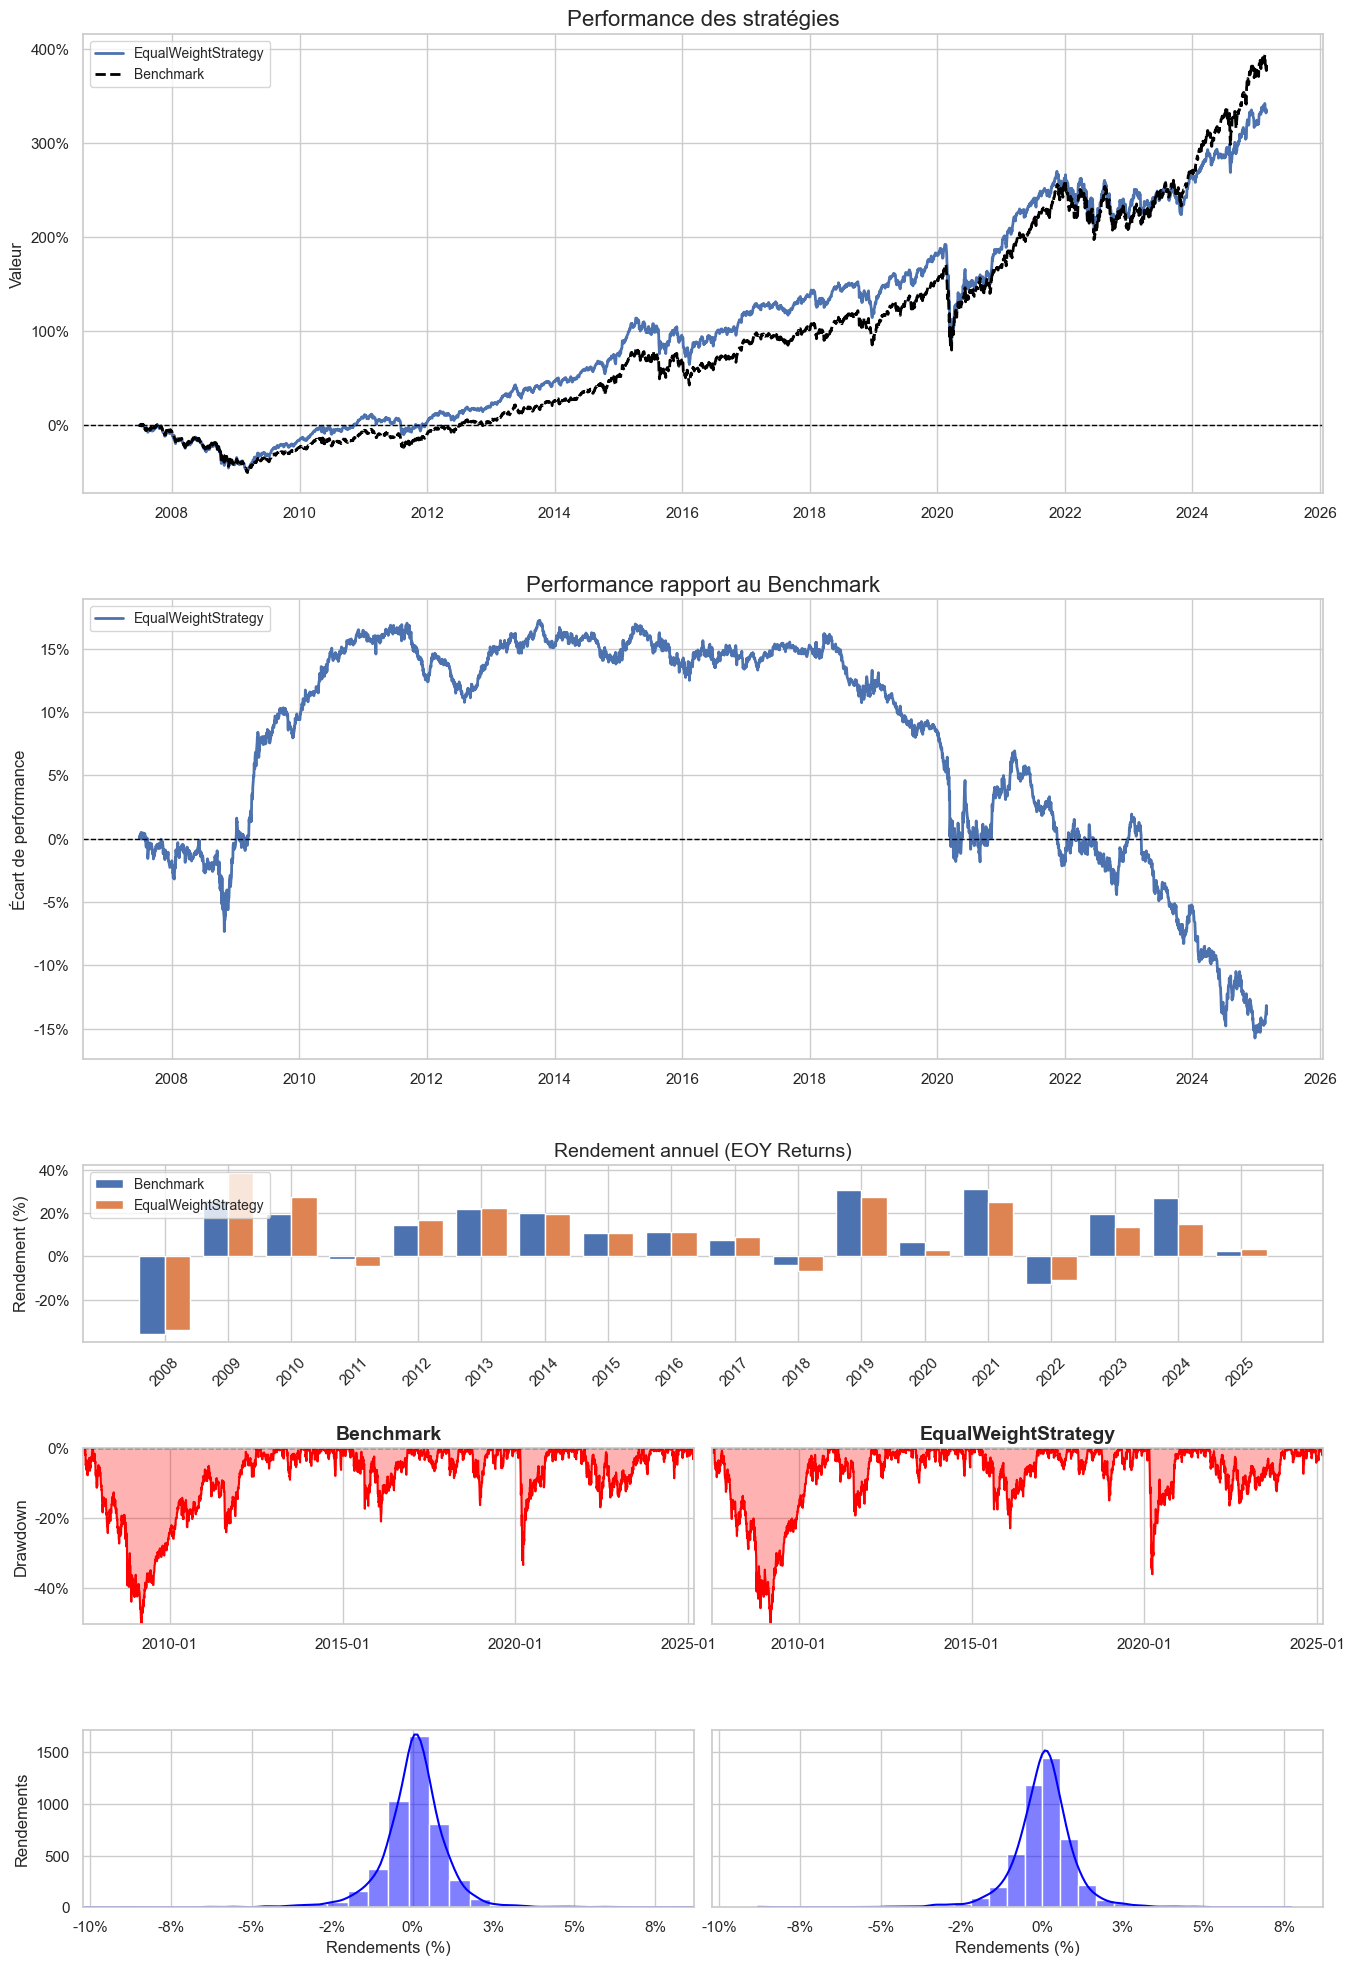

|                              | Benchmark   | EqualWeightStrategy   |
|:-----------------------------|:------------|:----------------------|
| Performance                  | 382.71%     | 335.27%               |
| CAGR                         | 9.15%       | 8.52%                 |
| Volatility                   | 16.05%      | 15.09%                |
| Max Drawdown                 | -50.54%     | -50.39%               |
| Sharpe Ratio                 | 0.63        | 0.62                  |
| Annualized Transactions Cost | 0.00%       | 0.00%                 |
| Tracking Error               | 0.0         | 4.58%                 |


In [10]:
EW.visualize()

In [8]:
EW.benchmark_weight

,1 HK Equity,10 HK Equity,101 HK Equity,1031 HK Equity,1038 HK Equity,11 HK Equity,1113 HK Equity,1128 HK Equity,12 HK Equity,127 HK Equity,...,ZG US Equity,ZI US Equity,ZIM US Equity,ZION US Equity,ZM US Equity,ZNGA US Equity,ZOT SM Equity,ZS US Equity,ZTS US Equity,ZURN SE Equity
Dates,,,,,,,,,,,,,,,,,,,,,
2022-03-31,0.000330,0.0,0.000062,0.0,0.000054,0.000237,0.000226,0.0,0.000093,0.0,...,0.000179,0.000263,0.000099,0.000166,0.000408,0.000166,0.0,0.000333,0.001388,0.001262
2022-04-29,0.000345,0.0,0.000064,0.0,0.000059,0.000238,0.000245,0.0,0.000099,0.0,...,0.000157,0.000228,0.000083,0.000156,0.000378,0.000162,0.0,0.000306,0.001424,0.001275
2022-05-31,0.000349,0.0,0.000062,0.0,0.000059,0.000234,0.000236,0.0,0.000103,0.0,...,0.000159,0.000195,0.000095,0.000158,0.000409,0.000000,0.0,0.000231,0.001376,0.001273
2022-06-30,0.000365,0.0,0.000070,0.0,0.000076,0.000260,0.000280,0.0,0.000100,0.0,...,0.000138,0.000185,0.000077,0.000154,0.000466,0.000000,0.0,0.000252,0.001505,0.001331
2022-07-29,0.000332,0.0,0.000062,0.0,0.000072,0.000220,0.000259,0.0,0.000086,0.0,...,0.000140,0.000196,0.000075,0.000153,0.000416,0.000000,0.0,0.000243,0.001482,0.001235
2022-08-31,0.000338,0.0,0.000059,0.0,0.000073,0.000224,0.000259,0.0,0.000087,0.0,...,0.000141,0.000245,0.000057,0.000162,0.000336,0.000000,0.0,0.000260,0.001328,0.001318
2022-09-30,0.000322,0.0,0.000064,0.0,0.000068,0.000241,0.000215,0.0,0.000081,0.0,...,0.000131,0.000253,0.000041,0.000165,0.000350,0.000000,0.0,0.000302,0.001399,0.001324
2022-10-31,0.000271,0.0,0.000046,0.0,0.000059,0.000209,0.000185,0.0,0.000066,0.0,...,0.000132,0.000253,0.000039,0.000158,0.000371,0.000000,0.0,0.000265,0.001330,0.001316
2022-11-30,0.000296,0.0,0.000063,0.0,0.000059,0.000214,0.000187,0.0,0.000083,0.0,...,0.000152,0.000152,0.000033,0.000148,0.000314,0.000000,0.0,0.000215,0.001273,0.001375
